### Load the diabetes data set

In [122]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sklm

In [ ]:
cancer = load_breast_cancer()

In [ ]:
print(cancer["DESCR"])

In [ ]:
features = cancer["data"]
labels = cancer["target"]

In [ ]:
features_df = pd.DataFrame(data=features,columns=cancer["feature_names"])
labels_df = pd.DataFrame(data=labels,columns=["label"])

In [ ]:
features_df

In [ ]:
labels_df

### split the data into training and test set with 80 - 20

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(features_df,labels_df,test_size=0.2,random_state=10)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

### load the logistic regression 

In [ ]:
lr = LogisticRegression()

### fit the logistic regression on training data to create the model

In [ ]:
lr.fit(X_train,y_train)

### see the coefficients and intercept

In [ ]:
for feature,coef in zip(cancer["feature_names"],lr.coef_.flatten()):
    print(feature,coef)
print("intercept {}".format(lr.intercept_[0]))

### predict the classes on the new data set i.e our test data set

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

The logistic regression model outputs probabilities for each class. The class with the highest probability is taken as the score (prediction). 

In [ ]:
probabilities = lr.predict_proba(X_test)
print(probabilities[:15,:])

The first column is the probability of a score of $0$ and the second column is the probability of a score of $1$. Notice that for most, but not all cases, the probability of a score of $0$ is higher than $1$. 

## Score and evaluate the classification model

Now that the class probabilities have been computed these values must be transformed into actual class scores. Recall that the log likelihoods for two-class logistic regression are computed by applying the sigmoid or logistic transformation to the output of the linear model. The simple choice is to set the threshold between the two likelihoods at $0.5$. The code in the cell below applies this initial threshold to the probability of a score of $0$ for the test data. A few examples along with the known labels are then displayed. Execute this code and examine the result.

In [116]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(np.array(y_test[:15]).flatten())

[0 1 1 0 1 1 1 0 0 0 1 1 0 1 0]
[0 1 1 0 1 1 1 1 0 0 1 1 0 1 0]


Some of the positive ($1$) predictions agree with the test labels in the second row, but several do not.

# Evaluation metrics

For classifiers there are a number of metrics commonly used. The **confusion matrix** lays out the correctly and incorrectly classified cases in a tabular format. There are various metrics derived from the values in the confusion matrix. Some of the common cases are briefly reviewed below. 

**Confusion matrix**

The confusion matrix lays out correctly and incorrectly classified cases. For the binary (two-class) case the confusion matrix is organized as follows:

| | Scored Positive | Scored Negative|  
|------|:------:|:------:| 
|**Actual Positive** | True Positive | False Negative |
|**Actual Negative**| False Positive | True Negative |   

Here the four elements in the matrix are defined as:    
**True Positive** or **TP** are cases with positive labels which have been correctly classified as positive.     
**True Negative** or **TN** are cases with negative labels which have been correctly classified as negative.  
**False Positive** or **FP** are cases with negative labels which have been incorrectly classified as positive.   
**False Negative** or **FN** are cases with positive labels which have been incorrectly classified as negative.

When creating a confusion matrix it is important to understand and maintain a convention for which differentiating positive and negative label values. The usual convention is to call the $1$ case positive and the $0$ case negative. 

Notice that there is an ambiguity in which case is considered positive and which is considered negative when the confusion matrix is computed. Whenever you examine a confusion matrix it is a good idea to spend a moment and decide which case is which. This step will help you relate the results to the problem at hand. 

**Accuracy**

Accuracy is a simple and often misused metric. In simple terms, accuracy is the fraction of cases correctly classified. For a two-class classifier accuracy is written as:

$$Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$

Accuracy can be quite misleading. For example, say a classifier is used to detect fraudulent accounts and the rate of fraud is less than 1%. A naive model would be to say all accounts are not fraudulent. This model has accuracy exceeding  0.99. This sounds impressive, but is clearly useless. 

**Precision**

Precision is the fraction of correctly classified label cases out of all cases classified with that label value. We can express precision by the following relationship:

$$Precision = \frac{M_{i,i}}{\sum_j M_{i,j}}$$

$$ \text{precision} = \frac{TP}{FP + TP} $$

In other words, the precision statistic is the number of correctly classified cases for the label value divided by all the cases in the column. Thus, precision is sensitive to the number of cases correctly classified for a given score value. 

**Recall**  

Recall is the fraction of cases of a label value correctly classified out of all cases that actually have that label value. We can express recall by the following relationship:

$$Recall = \frac{M_{i,i}}{\sum_i M_{i,j}}$$

$$ \text{recall} = \frac{TP}{FN + TP} $$


In other words, the recall statistic is the number of correctly classified cases for the label value divided by all the cases in the row. Thus, precision is sensitive to the number of cases correctly classified for a given true label value. 

**F1**

The F1 statistic is weighted average of precision and recall. We can express F1 by the following relationship:

$$F1 = 2 * \frac{precision * recall}{precision + recall}$$

In other words, F1 is a weighted metric for overall model performance. 

**ROC** and **AUC**

The receiver operating characteristic or ROC is a curve that displays the relationship between the true positive rate on the vertical axis and false positive rate on the horizontal axis. The ROC curve shows the tradeoff between true positive rate and false positive rate. An example is illustrated below.   

In principle, you can pick the desired operating point for a classifier on this curve. Towards the left favors low false positive rate at the expense of true positive rate. Towards the right favors high true positive rate at the expense of higher false positive rate.  



<img src="img/ROC_AUC.JPG" alt="drawing" width="480px"/>


<center>**ROC curve with values of AUC for balanced two-class problem**</center>

The AUC is the area or integral under the ROC curve. The overall performance of the classifier is measured by the area under the curve or AUC. But, how can you interpret a specific AUC value? The higher the AUC the lower the increase in false positive rate required to achieve a required true positive rate.  For an ideal classifier the AUC is 1.0. A true positive rate is achieved with a 0 false positive rate. This behavior means that AUC is useful for comparing classifiers. The classifier with higher AUC is generally the better one.

For balanced cases, random guessing gives an AUC or 0.5. A balanced case has equal numbers of positive and negative cases. So Bernoulli sampling (random guessing) with a probability $p$ for the positive case, will produce a ROC curve that runs diagonally from $0.0,0.0$ to $1.0,1.0$. The area under this triangular region is 0.5. It is often said that a classifier with an AUC of greater than 0.5 is better than random guessing. But, **for unbalanced cases this statement is not in true in general**. 

****
**Note:** The term receive operating characteristic may seem a bit odd in the machine learning context. This term arose in the early days of radar engineering as a metric to measure the tradeoff between radar signal receiver correctly detecting a target, say an aircraft, and producing a positive response from noise, such as flying birds or clouds. A radar receiver would be adjusted to the desired operating point along its ROC curve. 
****

In [120]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)

                 Confusion matrix
                 Score positive    Score negative
Actual positive        37                 2
Actual negative         5                70

Accuracy  0.94
 
           Positive      Negative
Num case       39            75
Precision    0.88          0.97
Recall       0.95          0.93
F1           0.91          0.95


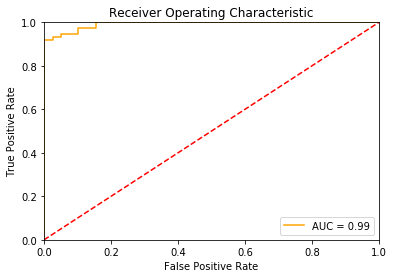

In [123]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)  